In [1]:
from periodic_orbits import is_periodic, is_equilibrium, stg_coordinate, get_periodic_domains
from ode_functions import theta_from_param,ic_function, fun, convert_to_dict, get_parameter_node, get_ic_domain, plot_projections, plot_time_series, plot_phase_projection
from ipynb.fs.full.ode_functions import get_param_distance, param_line, lower_double_id, upper_double_id, separate, generate_all_lines, check_list
from periodic_orbits2 import check_sequence
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.decomposition import PCA

In [2]:
#decay rates
decays = {'d_p' : 1, 'd_mc' : 1, 'd_mn' : 1}

#hill coefficient
n = 90

#ode solver parameters
t0 = 0
tf = 100

In [3]:
#Import parameters

mfront1 = pd.read_csv("Parameter_datasets/P1MBWfrontnode1.csv", header = None)
mfrontparams1 = convert_to_dict(mfront1)

mfront2 = pd.read_csv("Parameter_datasets/P1MBWfrontnode2.csv", header = None)
mfrontparams2 = convert_to_dict(mfront2)

mfront3 = pd.read_csv("Parameter_datasets/P1MBWfrontnode3.csv", header = None)
mfrontparams3 = convert_to_dict(mfront3)

mfront4 = pd.read_csv("Parameter_datasets/P1MBWfrontnode4.csv", header = None)
mfrontparams4 = convert_to_dict(mfront4)

mfront5 = pd.read_csv("Parameter_datasets/P1MBWfrontnode5.csv", header = None)
mfrontparams5 = convert_to_dict(mfront5)

mfront6 = pd.read_csv("Parameter_datasets/P1MBWfrontnode6.csv", header = None)
mfrontparams6 = convert_to_dict(mfront6)

mfront7 = pd.read_csv("Parameter_datasets/P1MBWfrontnode7.csv", header = None)
mfrontparams7 = convert_to_dict(mfront7)

mfront8 = pd.read_csv("Parameter_datasets/P1MBWfrontnode8.csv", header = None)
mfrontparams8 = convert_to_dict(mfront8)

mfront9 = pd.read_csv("Parameter_datasets/P1MBWfrontnode9.csv", header = None)
mfrontparams9 = convert_to_dict(mfront9)

mfront10 = pd.read_csv("Parameter_datasets/P1MBWfrontnode10.csv", header = None)
mfrontparams10 = convert_to_dict(mfront10)

mfront_params = [mfrontparams1, mfrontparams2, mfrontparams3, mfrontparams4, mfrontparams5, mfrontparams6, mfrontparams7, mfrontparams8, mfrontparams9,
             mfrontparams10]

In [4]:
#generate ICs in high Mn region to avoid overshoot
mfront_ICs = []
for i in range(10):
    mfront_ICs.append(ic_function("112", mfront_params[0]))

In [5]:
#compute orbit lengths for all parameter, initial condition combinations
mfront_lengths = []#store orbit lengths, each set of 10 lengths corresponds to different ICs within same parameter
mfront_sizes = []
for param in mfront_params:
    theta = theta_from_param(param)
    for IC in mfront_ICs:
        sol = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = IC, method = 'BDF')
        output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
        mfront_lengths.append(len(output))
        mfront_sizes.append(upper_double_id(output))

/Users/Erika/Documents/Math/Research/periodic_orbits.py:96: UserWarning: get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = 2. The trajectory may not be periodic.
  warnings.warn('get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = {}. The trajectory may not be periodic.'.format(num_periods_to_verify))


In [6]:
#observe orbit lengths (columns are different initial conditions)
endpts = [0,10,20,30,40,50,60,70,80,90,100]
for i in range(len(endpts)-1):
    print('mfront_param', i, ':', mfront_lengths[endpts[i]:endpts[i+1]])

mfront_param 0 : [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
mfront_param 1 : [6, 70, 6, 6, 6, 70, 6, 70, 6, 6]
mfront_param 2 : [9, 9, 9, 10, 9, 9, 9, 9, 9, 9]
mfront_param 3 : [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
mfront_param 4 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
mfront_param 5 : [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
mfront_param 6 : [10, 10, 10, 10, 10, 10, 10, 10, 9, 10]
mfront_param 7 : [10, 9, 10, 10, 10, 10, 10, 10, 10, 10]
mfront_param 8 : [10, 9, 117, 10, 126, 135, 10, 99, 10, 10]
mfront_param 9 : [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [7]:
#observe orbit lengths (columns are different initial conditions)
endpts = [0,10,20,30,40,50,60,70,80,90,100]
for i in range(len(endpts)-1):
    print('mfront_param', i, ':', mfront_sizes[endpts[i]:endpts[i+1]])

mfront_param 0 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mfront_param 1 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mfront_param 2 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mfront_param 3 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mfront_param 4 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mfront_param 5 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mfront_param 6 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mfront_param 7 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mfront_param 8 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mfront_param 9 : ['Large', '

Not very interesting to pursue linear connections or PCA analysis here (do PCA to have for combined PCA, though)... Perhaps sample parameter node more densely (as with no BW case) and see if other lengths appear.

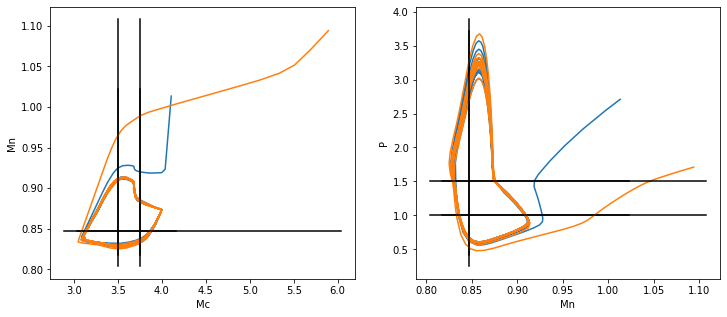

In [9]:
#plotting framework
param = mfront_params[0]
sol0 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = mfront_ICs[0], method = 'BDF')
sol1 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = mfront_ICs[1], method = 'BDF')

fig,(ax1,ax2) = plot_projections(sol0, param)
plot_projections(sol1, param, axs = (ax1, ax2))
# ax1.set_xlim(1,2.75)
# # ax1.set_ylim(0.3,0.8)
# ax2.set_xlim(0.6,1)
# ax2.set_ylim(0,8.5)

### PCA Stuff

In [10]:
#0 is small, 1 is large
mfront_param_colors = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

mfrontdf1 = pd.DataFrame.from_dict(mfrontparams1, orient = 'index')
mfrontdf1 = mfrontdf1.T
mfrontdf2 = pd.DataFrame.from_dict(mfrontparams2, orient = 'index')
mfrontdf2 = mfrontdf2.T
mfrontdf3 = pd.DataFrame.from_dict(mfrontparams3, orient = 'index')
mfrontdf3 = mfrontdf3.T
mfrontdf4 = pd.DataFrame.from_dict(mfrontparams4, orient = 'index')
mfrontdf4 = mfrontdf4.T
mfrontdf5 = pd.DataFrame.from_dict(mfrontparams5, orient = 'index')
mfrontdf5 = mfrontdf5.T
mfrontdf6 = pd.DataFrame.from_dict(mfrontparams6, orient = 'index')
mfrontdf6 = mfrontdf6.T
mfrontdf7 = pd.DataFrame.from_dict(mfrontparams7, orient = 'index')
mfrontdf7 = mfrontdf7.T
mfrontdf8 = pd.DataFrame.from_dict(mfrontparams8, orient = 'index')
mfrontdf8 = mfrontdf8.T
mfrontdf9 = pd.DataFrame.from_dict(mfrontparams9, orient = 'index')
mfrontdf9 = mfrontdf9.T
mfrontdf10 = pd.DataFrame.from_dict(mfrontparams10, orient = 'index')
mfrontdf10 = mfrontdf10.T

mfront_param_data = pd.concat([mfrontdf1,mfrontdf2,mfrontdf3,mfrontdf4,mfrontdf5,mfrontdf6,mfrontdf7,mfrontdf8,mfrontdf9,mfrontdf10])

mfront_param_data['OrbitLength'] = mfront_param_colors

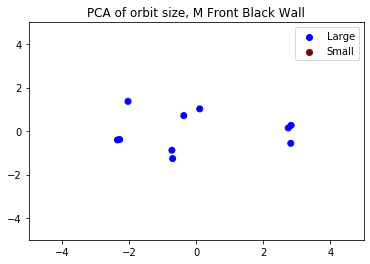

In [11]:
pca = PCA(n_components = 2)
pca.fit(mfront_param_data.iloc[:,0:17])
mfront_pca = pca.transform(mfront_param_data.iloc[:,0:17])

labels = mfront_param_data.loc[:,'OrbitLength']
label_colors = {0:'maroon',1:'blue'}
cvec = [label_colors[label] for label in labels]
plt.scatter(mfront_pca[:,0],mfront_pca[:,1], c = cvec)
plt.scatter(25,25,c = 'blue',label = 'Large')#point at (25,25) just for labeling purposes
plt.scatter(25,25,c = 'maroon', label = 'Small')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('PCA of orbit size, M Front Black Wall')
plt.legend(loc = 'best')
# plt.savefig('pca_all_attributes.png')
plt.show()
plt.close()